In [1]:
import matplotlib.pyplot as plt 
import numpy as np

%matplotlib notebook
#%matplotlib inline

plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = "dejavuserif"

## Loading refrective index data

In [2]:
%matplotlib notebook
from scipy import interpolate

def n_index(path):
    """Returns interpolated data as a function n"""
    csv  = np.genfromtxt(path, delimiter=",")
    x  = csv[1:,0]*1000
    y  = csv[1:,1]
    n = interpolate.interp1d(x, y) 
    return n

n_0 = n_index('./data/Air.csv') 
n_1 = n_index('./data/TiO2.csv') 
n_2 = n_index('./data/SiO2.csv') 
n_g = n_index('./data/Ga2O3.csv') 

<IPython.core.display.Javascript object>


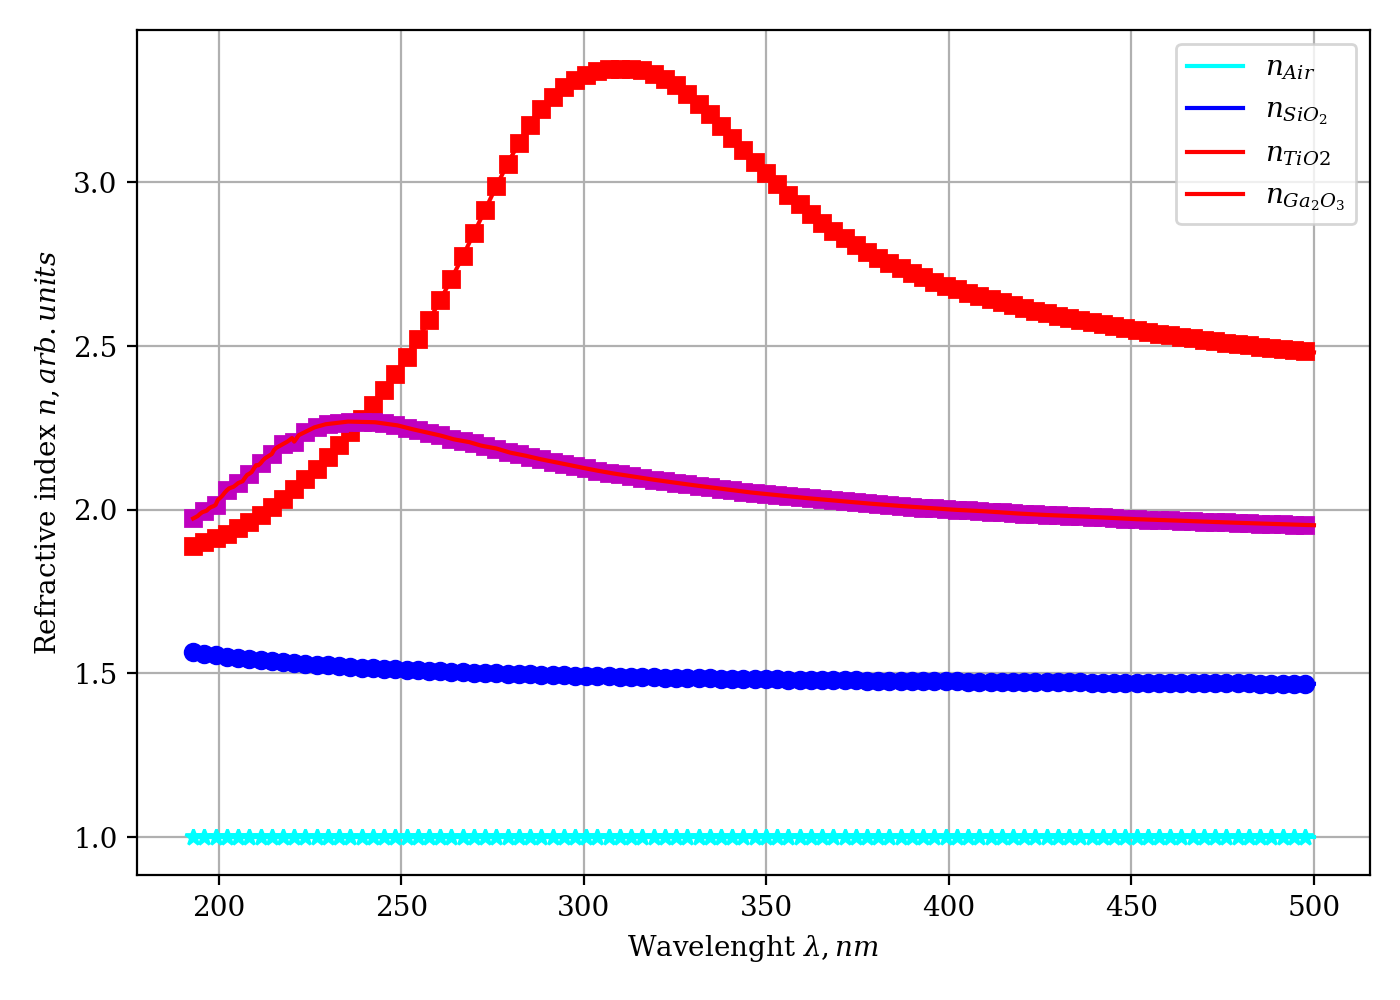

In [3]:
x = np.linspace(193, 500, 500)
fig=plt.figure(figsize=(7,5))
    
ax1=fig.add_subplot(111)

ax1.set_ylabel(r'Refractive index $n, arb. units$')
ax1.set_xlabel('Wavelenght $\lambda, nm$')
ax1.plot(x[::5], n_0(x[::5]), '*', c = 'cyan')
ax1.plot(x, n_0(x), c='cyan', label = r'$n_{Air}$')
ax1.plot(x[::5], n_2(x[::5]), 'o', c = 'blue')
ax1.plot(x, n_2(x),'b', label = r'$n_{SiO_2}$')
ax1.plot(x[::5], n_1(x[::5]), 's', c= 'red')
ax1.plot(x, n_1(x),'r', label = r'$n_{TiO2}$')
ax1.plot(x[::5], n_g(x[::5]), 's', c= 'm')
ax1.plot(x, n_g(x),'r', label = r'$n_{Ga_2O_3}$')


ax1.legend()
ax1.grid(True)
#plt.savefig('n(l)'+'.png', dpi = 500)
plt.tight_layout()

## Distrubuter Bragg Reflector (DBR)

A **Distributed Bragg Reflector (DBR)** is a structure formed from multiple layers of alternating materials with varying refractive index. Each layer boundary causes a partial reflection of an optical wave. For waves whose vacuum wavelength is close to four times the optical thickness of the layers $\lambda_b$, the many reflections combine with constructive interference, and the layers act as a high-quality reflector. The range of wavelengths that are reflected is called the photonic stopband. Within this range of wavelengths, light is "forbidden" to propagate in the structure.

![Reflection of light in a DBR](img/dbr.png)

The same principle is used to create multilayer antireflection coatings that are used, including for solar cells. In such coatings, the layer thicknesses are chosen so as to minimize the reflection of $\text{R}$ and, accordingly, to maximize the transmission of $\text{T}$ (it should be noted that the law $\text{T} = 1 - \text{R}$ holds for dielectric structures)

$$d_1\cdot n_1 = d_2\cdot n_2 = \frac{\lambda_b}{4}$$

Assuming that a plane light wave is incident strictly perpendicular to the surface of the DBR, the layers are homogeneous and isotropic, the faces of the layers are strictly parallel, then for such a model structure of the DBR we can write the reflection coefficient $R$ in the following rather simple form: - for structures where the refractive indices form the sequence $n_0|n_1|n_2|n_1|n_2|...|n_2|n_s$

$$\text{R} = \left(\frac{1-\frac{n_s}{n_0}\left(\frac{n_1}{n_2}\right)^{2N}}{1+\frac{n_s}{n_0}\left(\frac{n_1}{n_2}\right)^{2N}}\right)^2$$

where $N$ - is number of $n_1+n_2$ layers

Thus, the larger the ratio of refractive indices $n_1/n_2$ and $N$, the higher the reflection coefficient of the DBR. With an increase in the number of layers, the region of high reflection narrows, the peak $R$ becomes flatter and acquires the form of a plateau, and the magnitude of reflection increases. Plateau width $\Delta\lambda$ i.e. stopband depends on the difference in the refractive indices of the layers in accordance with the expression:

$$\Delta\lambda = \frac{2\lambda_b\cdot\Delta n}{\pi\cdot n_{eff}}$$

where $\Delta n = n_1 - n_2$; $n_{eff} = 2\left(\frac{1}{n_1}+\frac{1}{n_2}\right)^{-1}$

## Epitaxial layers thickness calculation

Due to the centrally symmetric design of the reactor growth chamber, it is possible to build a profile along the radius of the chamber on which two plates lie. Thus, using the experimental data for two samples, it is possible to judge the uniformity of the growth process.

![](img/epitaxy_chamber.png)

Method based on mapping whole substrate. A reflectivity spectrum is taken at each point on substrate surface. Data obtained on line between ${300}^\circ$ and ${120}^\circ$ of $\text{Al}_{0.6}\text{Ga}_{0.4}\text{As}\text{ / } \text{AlAs}$ layers on two $\text{Ge}$ substrates:

![](M1/M1_1.bmp)

## Transfer-matrix method

There are two waves at each point: one propagates to the right $E^R$, the second to the left $E^L$. Then the vector has two elements:

![](img/layers.png)

$$E = \begin{pmatrix} E^R \\ E^L\end{pmatrix}$$

For any two points, the vectors will be connected by a certain linear expression that takes into account the propagation of light through the medium and through the boundaries of two media. This expression can be written using matrices. Basically, we need two matrices. The first $\textbf{M}_1$ connects the vectors to the left and to the right of the interface. The second $\textbf{M}_2$ describes the propagation of a wave in a homogeneous medium (between interfaces).

$$\begin{pmatrix} E^R_2 \\ E^L_2\end{pmatrix} = \textbf{M}_1\cdot \begin{pmatrix} E^R_1 \\ E^L_1\end{pmatrix}, \,\,\, \begin{pmatrix} E^R_3 \\ E^L_3\end{pmatrix} = \textbf{M}_2\cdot \begin{pmatrix} E^R_3 \\ E^L_3\end{pmatrix}$$

вывод 

$$E^L_1 = \frac{n_1-n_2}{n_1+n_2},\,\,\,E^R_2 = \frac{2 n_1}{n_1+n_2},$$

$$E^R_2 = \frac{n_2-n_1}{n_2+n_1},\,\,\,E^L_1 = \frac{2 n_2}{n_2+n_1}.$$

$$\begin{pmatrix} E^R_2 \\ E^L_2\end{pmatrix} 
=\frac{1}{2 n_2} \begin{pmatrix} n_2 +n_1 & n_2-n_1\\ n_2-n_1 & n_2 +n_1\end{pmatrix}\cdot\begin{pmatrix} E^R_1 \\ E^L_1\end{pmatrix}
=\textbf{M}_1\cdot \begin{pmatrix} E^R_1 \\ E^L_1\end{pmatrix}$$

$$\begin{pmatrix} E^R_4 \\ E^L_4\end{pmatrix} 
=\frac{1}{2 n_2} \begin{pmatrix} e^{i k L} &0\\ 0 & e^{-i k L}\end{pmatrix}\cdot\begin{pmatrix} E^R_1 \\ E^L_1\end{pmatrix}
=\textbf{M}_2\cdot \begin{pmatrix} E^R_3 \\ E^L_3\end{pmatrix}$$
where $k = \frac{2\pi n}{\lambda}$, $n$ – refrective index, $\lambda$ – wavelenght, $L$ – layer thickness.

![](img/layers2.png)

$$\begin{pmatrix} E^R_B \\ E^L_B\end{pmatrix} 
= \textbf{M}_1^{(1)}\textbf{M}_2^{(1)} \textbf{M}_1^{(2)}\textbf{M}_2^{(2)}
\textbf{M}_1^{(3)}\textbf{M}_2^{(3)}
\textbf{M}_1^{(4)}\textbf{M}_2^{(4)}
\cdot \begin{pmatrix} E^R_A \\ E^L_A\end{pmatrix}$$

$$\begin{pmatrix} t\\ 0\end{pmatrix}  = M \begin{pmatrix} 1 \\ r\end{pmatrix} $$

$$r = \frac{M_{21}}{M_{11}}$$

$$R = r^2$$

## Chebyshev polynomial of second kind

$$\textbf{M}^N = \begin{pmatrix} a & b\\ c& d\end{pmatrix}^N= \begin{pmatrix} a\cdot U_{N-1}(p) - U_{N-2}(p) & b\cdot U_{N-1}(p)\\ c\cdot U_{N-1}(p)& d\cdot U_{N-1}(p) - U_{N-2}(p)\end{pmatrix}$$
where $p = \frac{a+d}{2}$; $U_N(x) = \frac{sin\left[(N+1)\right]arccos(x)}{sin\left[arccos(x)\right]}$

In [4]:
def mat_pow(M, N):
    """Returns matrix M in N-th power using 
    Chebyshev polinoms of second kind
    M – Unimodular matrix
    N – power
    
    return = M**N
    """
    
    def U_N(x, N):
        "Returns Chebyshev polinom of N-th power with x as argument"
        U = np.sin((N+1)*np.arccos(x))/(np.sin(np.arccos(x)))
        return U
    
    p = (M[0,0] + M[1,1])/2
    
    U_m1 = U_N(p, N-1)
    U_m2 = U_N(p, N-2)
    
    a = M[0,0]*U_m1 - U_m2
    b = M[0,1]*U_m1
    c = M[1,0]*U_m1
    d = M[1,1]*U_m1 - U_m2
    
    X = np.matrix([[a, b],
                   [c, d]])
        
    return X   

In [5]:
def Reflectance(M):
    """Returns reflectance """

    R = np.abs(M[1,0])**2/(np.abs(M[1,0])**2 + (0.9999)**2)
    #R = (-M[0,1]/M[1,1])**2
    #R = (-M[1,0]/M[0,0])**2
    #R = (-M[1,0]/M[1,1])**2
    #print('M10=', M[1,0], 'M00=', M[0,0])
    #R = (M[1,0])**2
    #R = R*(1/M[0,0])**2
    return R

In [6]:
def matrices(l_1, l_2, l_s, wl, N):
    """Returns transfer matrices of DBR with
    l_1 – First layer thickness
    l_2 – Second layer thickness
    l_s – Substrate thickness
    wl  – Wavelenght
    N   – Number of superlattice layers
    """
    def generate_matrix(n_1, n_2, l_2, wl):
        """Returns transfer matrix of a n_1/n_2 border
        reflected wave and passed n_2 region with l_2 thickness
        
        ....|  (n_1)  |  (n_2)  |
        ....|         |         |
        ....| ~~~~~~> | ~~~~~~> |
        ....|         |         |
        ....|<--l_1-->|<--l_2-->|
        
        """
        
        M1 = np.matrix([[n_2(wl) + n_1(wl), n_2(wl) - n_1(wl)],
                        [n_2(wl) - n_1(wl), n_2(wl) + n_1(wl)]])
        M1 = M1/(2*n_2(wl))
        
        k  = 2*np.pi*n_2(wl)/wl
        T  = l_2
        
        M2 = np.matrix([[np.exp(1j*k*T),                   0],
                        [0               ,   np.exp(-1j*k*T)]])
        return M1@M2
    
    ## Air/First layer:
    M01 = generate_matrix(n_0, n_1, d1, wl)
    ## First/Second layer
    M12 = generate_matrix(n_1, n_2, d2, wl)
    M21 = generate_matrix(n_2, n_1, d1, wl)
    ML  = M12@M21
    ML  = mat_pow(ML, N)
    ## Second/Substrate layer
    M2S = generate_matrix(n_2, n_g, ds, wl)
    
    #M = M01@ML@M2S # air and substrate
    M = ML@M2S  #substrate
    #M = M01@ML #air
    #M = ML # only layers
    
    return M

In [7]:
lb = 420
d1 = lb/4/n_1(lb)
d2 = lb/4/n_2(lb)
ds = 10000

In [8]:
print('Layer 1 = %.2f nm;'%d1, 'Layer 2 = %.2f nm'%d2)
N  = [5] #number of layerstransfer-matrix method
wl = np.linspace(193, 900, 500)

Layer 1 = 40.11 nm; Layer 2 = 71.25 nm


In [9]:
R  = []
for j in N:
    Reflects = []
    for i in wl:
        M = matrices(d1, d2, ds, i, j)
        temp = Reflectance(M)
        Reflects.append(temp)
    R.append(Reflects)

<IPython.core.display.Javascript object>


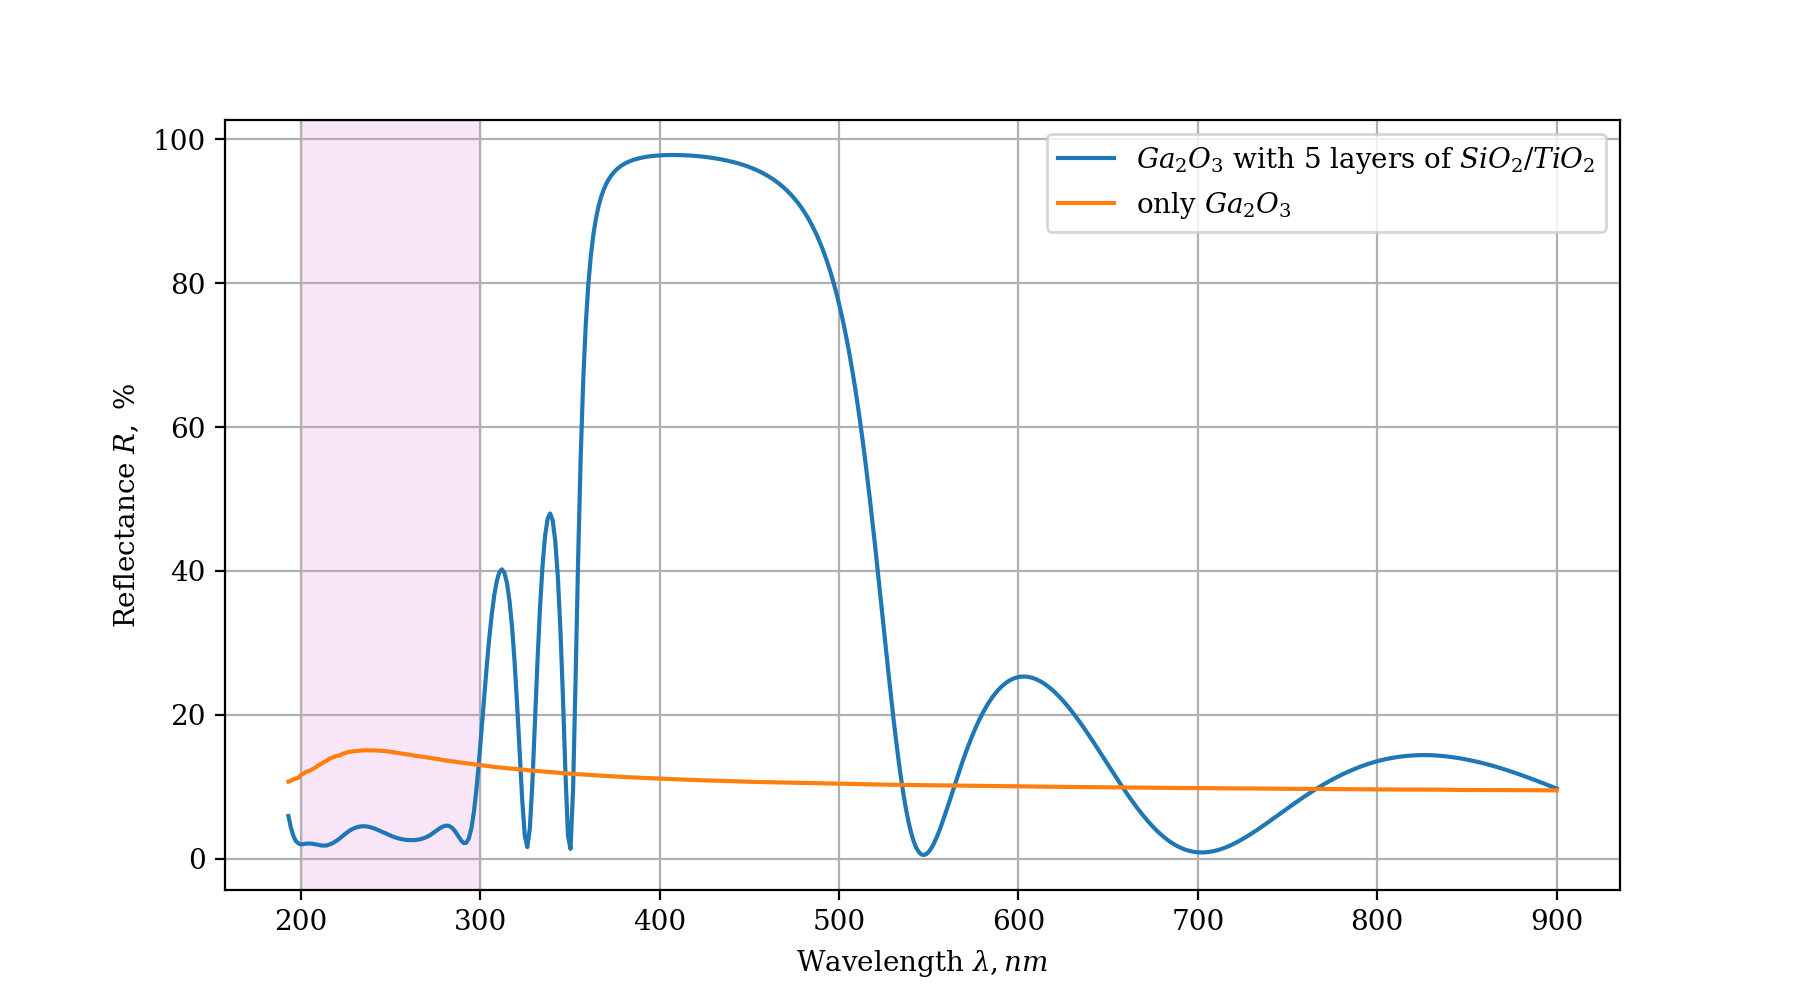

In [10]:
fig = plt.figure(figsize=(9,5))

ax  = fig.add_subplot(111)

ax.set_ylabel(r'Reflectance $R,$ %')
ax.set_xlabel('Wavelength $\lambda, nm$')

for i in range(len(N)):
    if i != 4:
        ax.plot(wl, np.asarray(R[i])*100,'-', label = r'$Ga_2O_3$ with $%.0f$ layers of $SiO_2/TiO_2$'%N[i])
    else: 
        ax.plot(wl, np.asarray(R[i])*100,'-', label = r'$N = %.0f$'%N[i])

R_g = ((n_g(wl)-n_0(wl))/(n_g(wl) + n_0(wl)))**2
ax.plot(wl, R_g*100, label = r'only $Ga_2 O_3$')
ax.axvspan(200, 300, color='m', alpha=0.1)


ax.grid()
ax.legend()

#plt.savefig('Ga2O3 antireflective'+'.png', dpi = 500)№

<IPython.core.display.Javascript object>


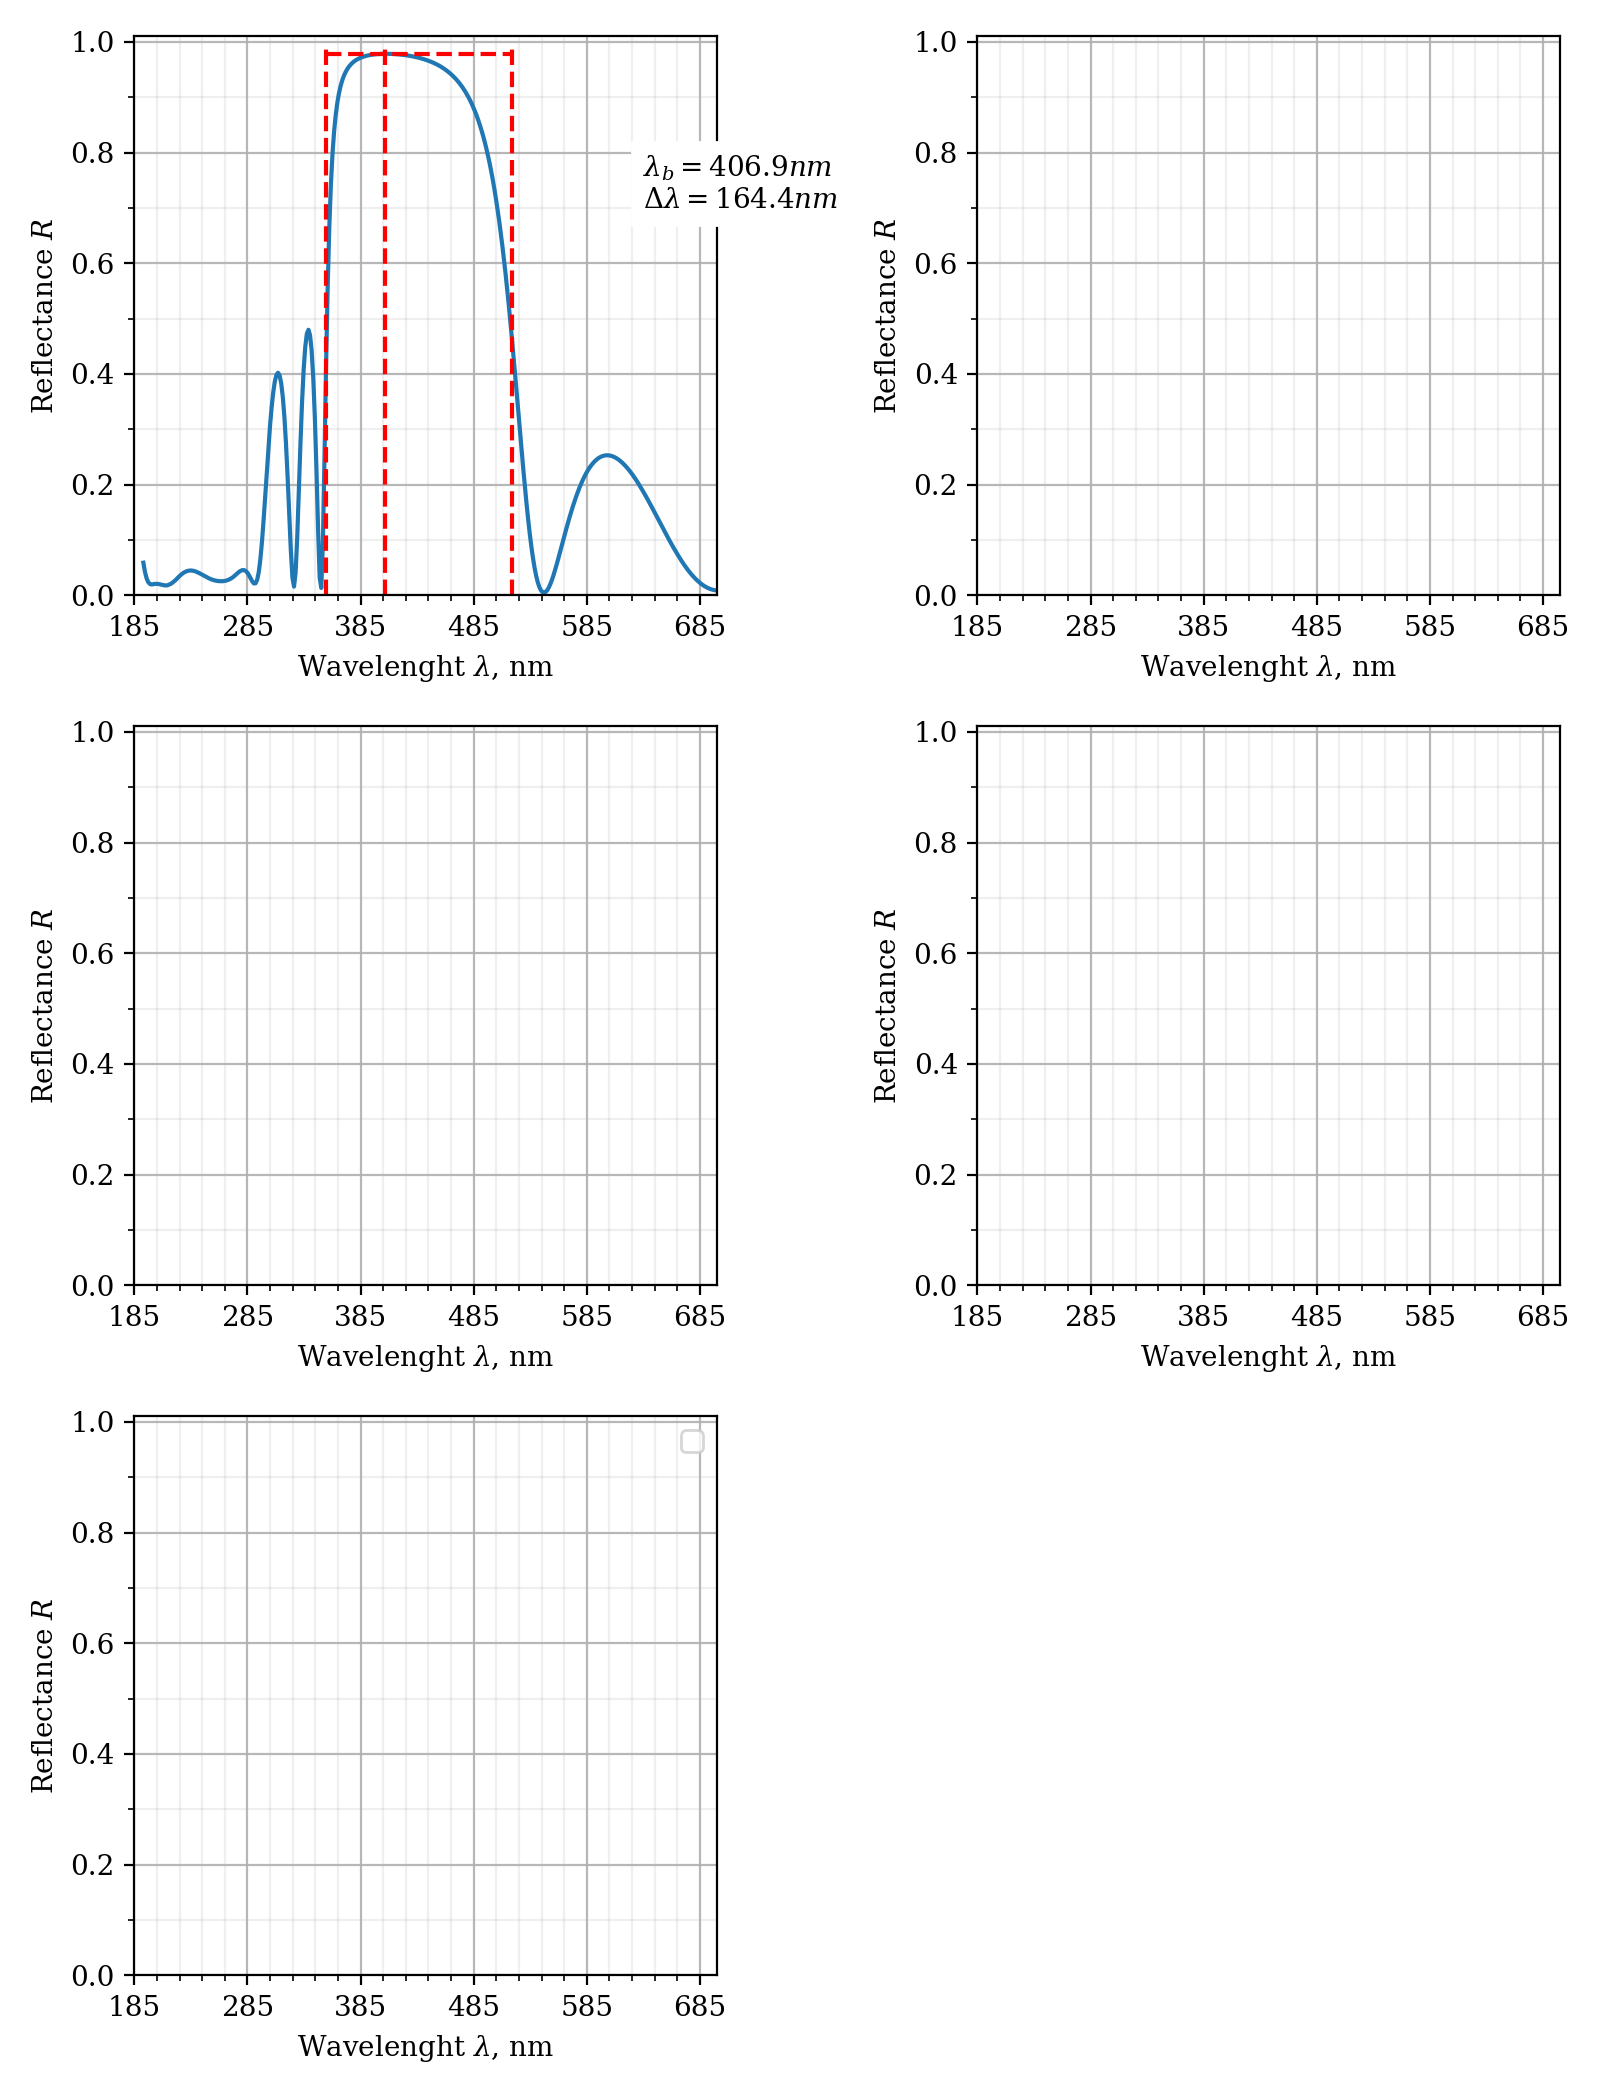

No handles with labels found to put in legend.


In [11]:
fig = plt.figure(figsize=(8,10.5))

axx = []

x_max = 700
x_min = 185
y_max = 1.01
y_min = 0

for i in range(1,6):
    axx.append(fig.add_subplot(3, 2, i))
    
    major_ticks_x = np.arange(x_min, x_max, 100)
    minor_ticks_x = np.arange(x_min, x_max, 20)
    major_ticks_y = np.arange(y_min, y_max, 0.2)
    minor_ticks_y = np.arange(y_min, y_max, 0.1)

    axx[i-1].set_xticks(major_ticks_x)
    axx[i-1].set_xticks(minor_ticks_x, minor=True)
    axx[i-1].set_yticks(major_ticks_y)
    axx[i-1].set_yticks(minor_ticks_y, minor=True)
    
    if i%2 == 0:
        axx[i-1].set_ylabel(r'Reflectance $R$')
        axx[i-1].set_xlabel(r'Wavelenght $\lambda$, nm')
        axx[i-1].set_xlim(x_min, x_max)
        axx[i-1].set_ylim(y_min, y_max)
        axx[i-1].grid(which='both')
        axx[i-1].grid(which='minor', alpha=0.2)
        axx[i-1].grid(which='major', alpha=0.9)
        
        #axx[i-1].plot([0,1], [a_GaP, a_InP], 'k--')
        
        
        
    else:
        axx[i-1].set_ylabel(r'Reflectance $R$')
        axx[i-1].set_xlabel(r'Wavelenght $\lambda$, nm')
        axx[i-1].set_xlim(x_min, x_max)
        axx[i-1].set_ylim(y_min, y_max)
        axx[i-1].grid(True, which = "both",ls = "-")
        axx[i-1].grid(which='both')
        axx[i-1].grid(which='minor', alpha=0.2)
        axx[i-1].grid(which='major', alpha=0.9)
        
        


R  = []

for j in N:
    y = []
    for dl in wl:
        M = matrices(d1, d2, ds, dl, j)
        temp = Reflectance(M)
        y.append(temp)
        
    R.append(y)
    
lenght  = len(R[0])
    
for i in range(len(N)):
    axx[i].plot(wl, R[i], label = r'$N=%.0f$'%(N[i]))

    #plt.xticks(x, np.linspace(a[i], b[i], lenght))
    
posm = []
for i in range(len(N)):
    x = np.amax(R[i])
    posm.append(x)

    
pos = []
for i in range(len(N)):
    x = np.where(R[i] == posm[i])[0][0]
    pos.append(x)


posl = []
posr = []
for i in range(len(N)):
    for j, v in enumerate(R[i][pos[i]:0:-1]):
        if R[i][pos[i]:0:-1][j] <= posm[i]/2:
            left = pos[i] - j
            break
    for j, v in enumerate(R[i][pos[i]:-1:1]):
        if R[i][pos[i]:-1:1][j] <= posm[i]/2:
            right = pos[i] + j
            break
    posl.append(left)
    posr.append(right)



for i in range(len(N)):
    axx[i].axvline(x = wl[pos[i]],  ymin = 0,       ymax = posm[i], c='r', ls = '--')
    axx[i].axvline(x = wl[posl[i]], ymin = 0,       ymax = posm[i], c='r', ls = '--')
    axx[i].axvline(x = wl[posr[i]], ymin = 0,       ymax = posm[i], c='r', ls = '--')
    axx[i].axhline(y = posm[i], xmin = (wl[posl[i]]-x_min)/(x_max-x_min), xmax = (wl[posr[i]]-x_min)/(x_max-x_min), c='r', ls = '--')
    axx[i].annotate(r'$\lambda_b = %.1f nm$'%wl[pos[i]]+'\n'+'$\Delta \lambda = %.1f nm$'%(wl[posr[i]]-wl[posl[i]]),
                    xy = (x_max-65,0.7), backgroundcolor='w')

for i in range(len(N)):
    axx[i-1].legend(loc = 'upper right')
        
plt.tight_layout()
#plt.savefig('121212(lmbd)'+'.png', dpi = 500)